In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [11]:
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [12]:
train_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Train"
val_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Validation"
test_dir = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test"

In [13]:
model = InceptionV3(include_top=False,input_shape=(224, 224, 3), weights='imagenet')
input_shape = (224,224)

In [14]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.01,
                                  zoom_range=[0.9, 1.25],
                                  horizontal_flip=True,
                                  vertical_flip=False)

datagen_val = ImageDataGenerator(rescale=1./255)

datagen_test = ImageDataGenerator(rescale=1./255)

In [15]:
batch_size = 16

generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,                                                 
                                                    shuffle=True)

generator_val = datagen_val.flow_from_directory(directory=val_dir,
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                shuffle=False)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 4468 images belonging to 2 classes.
Found 639 images belonging to 2 classes.
Found 655 images belonging to 2 classes.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

image_paths_train = path_join(train_dir, generator_train.filenames)
image_paths_test = path_join(test_dir, generator_test.filenames)

cls_train = generator_train.classes
cls_test = generator_test.classes


class_names = list(generator_train.class_indices.keys())
num_classes = generator_train.num_classes
num_classes

2

In [18]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_2
True:	conv2d_94
True:	batch_normalization_94
True:	activation_94
True:	conv2d_95
True:	batch_normalization_95
True:	activation_95
True:	conv2d_96
True:	batch_normalization_96
True:	activation_96
True:	max_pooling2d_4
True:	conv2d_97
True:	batch_normalization_97
True:	activation_97
True:	conv2d_98
True:	batch_normalization_98
True:	activation_98
True:	max_pooling2d_5
True:	conv2d_102
True:	batch_normalization_102
True:	activation_102
True:	conv2d_100
True:	conv2d_103
True:	batch_normalization_100
True:	batch_normalization_103
True:	activation_100
True:	activation_103
True:	average_pooling2d_9
True:	conv2d_99
True:	conv2d_101
True:	conv2d_104
True:	conv2d_105
True:	batch_normalization_99
True:	batch_normalization_101
True:	batch_normalization_104
True:	batch_normalization_105
True:	activation_99
True:	activation_101
True:	activation_104
True:	activation_105
True:	mixed0
True:	conv2d_109
True:	batch_normalization_109
True:	activation_109
True:	conv2d_107
True:	conv2d_110
Tru

**My codes stared**

**Visualizing Intermediate Representations**

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

**My Code ended**

In [19]:
transfer_layer = model.get_layer('mixed10')
conv_model = Model(inputs=model.input, outputs=transfer_layer.output)

**Inception er fully connected layer gula baad diye dichilam. So shobar last projonto jeta ache ota conv_model e save kore then amra nijera model create kore nibo**

In [20]:
#for layer in conv_model.layers:
#    layer.trainable = False
    
# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
new_model.add(Dropout(0.5))

new_model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
#new_model.add(Dense(512, activation='relu'))


# Add the final layer for the actual classification.
new_model.add(Dense(num_classes, activation='softmax'))


In [21]:
optimizer = RMSprop(lr=0.0001)
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']

new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [22]:
def print_layer_trainable():
    for layer in new_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	functional_1
True:	flatten
True:	dropout
True:	dense
True:	dense_1


In [23]:
epochs = 10
#steps_per_epoch = 10
steps_per_epoch = generator_train.n / batch_size
steps_val = generator_val.n / batch_size
steps_test = generator_test.n / batch_size


history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
280/279 [==============================] - 2579s 9s/step - loss: 0.3825 - categorical_accuracy: 0.9208 - val_loss: 11.6820 - val_categorical_accuracy: 0.7542
Epoch 2/10
280/279 [==============================] - 114s 407ms/step - loss: 0.1343 - categorical_accuracy: 0.9662 - val_loss: 6.1610 - val_categorical_accuracy: 0.8504
Epoch 3/10
280/279 [==============================] - 114s 407ms/step - loss: 0.1385 - categorical_accuracy: 0.9772 - val_loss: 2.7962 - val_categorical_accuracy: 0.9374
Epoch 4/10
280/279 [==============================] - 114s 408ms/step - loss: 0.0961 - categorical_accuracy: 0.9850 - val_loss: 1.2227 - val_categorical_accuracy: 0.9267
Epoch 5/10
280/279 [==============================] - 114s 407ms/step - loss: 0.0707 - categorical_accuracy: 0.9888 - val_loss: 0.3149 - val_categorical_accuracy: 0.9679
Epoch 6/10
280/279 [==============================] - 114s 407ms/step - los

In [24]:
result = new_model.evaluate_generator(generator_test, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test-set classification accuracy: 98.32%


In [25]:
import cv2
import os
from tqdm import tqdm

In [26]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/Yes"

test_data = np.empty((1, 224, 224, 3))

for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (224, 224))  # resize to normalize data size
        
        #new_array = new_array.reshape((224, 224))
        
       
        new_array = new_array.reshape((-1, 224, 224, 3))
        #print(new_array.shape)
        test_data = np.append(test_data, new_array, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 229/229 [00:06<00:00, 33.26it/s]


In [27]:
test_data.shape

(230, 224, 224, 3)

In [28]:
scaled_data = test_data/255
new_model.predict_classes(scaled_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
path = "/content/drive/My Drive/CSE400/Data Pre Processing 3/Test/No"

test_data_2 = np.empty((1, 224, 224, 3))

for img_2 in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
    try:
        img_array_2 = cv2.imread(os.path.join(path,img_2))  # convert to array
        new_array_2 = cv2.resize(img_array_2, (224, 224))  # resize to normalize data size
        
        #new_array_2 = new_array.reshape((224, 224))
        
       
        new_array_2 = new_array_2.reshape((-1, 224, 224, 3))
        #print(new_array_2.shape)
        test_data_2 = np.append(test_data_2, new_array_2, axis = 0)  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        print(e)
        pass
        #except OSError as e:
        #    print("OSErrroBad img most likely", e, os.path.join(path,img))
        #except Exception as e:
        #    print("general exception", e, os.path.join(path,img))

100%|██████████| 426/426 [00:21<00:00, 19.92it/s]


In [35]:
test_data_2.shape

(427, 224, 224, 3)

In [36]:
scaled_data_2 = test_data_2/255
new_model.predict_classes(scaled_data_2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
# new_model.save('/content/drive/My Drive/CSE400/Saving Model/Inception V3')

<Figure size 432x288 with 0 Axes>

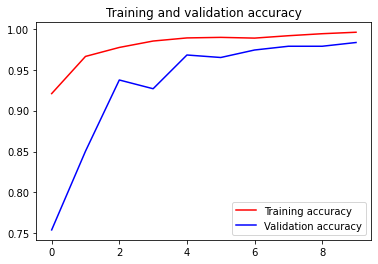

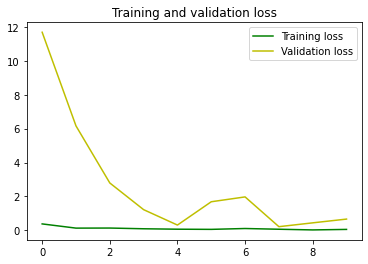

<Figure size 432x288 with 0 Axes>

In [30]:


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[   'categorical_accuracy' ]
val_acc  = history.history[ 'val_categorical_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------


plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()